In [425]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import explained_variance_score,r2_score
from time import time

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error

from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split

In [426]:
PATH_df = 'WA_Fn-UseC_-Accounts-Receivable.csv'
df = pd.read_csv(PATH_df)
df.sample(5)

,countryCode,customerID,PaperlessDate,invoiceNumber,InvoiceDate,DueDate,InvoiceAmount,Disputed,SettledDate,PaperlessBill,DaysToSettle,DaysLate
1645,897,8690-EEBEO,12/5/2012,6612984395,3/22/2012,4/21/2012,64.10,No,4/26/2012,Paper,35,5
777,406,6048-QPZCF,7/13/2012,3166292468,9/25/2013,10/25/2013,88.58,Yes,10/19/2013,Electronic,24,0
142,770,7050-KQLDO,9/29/2012,552732928,6/16/2013,7/16/2013,62.26,No,7/3/2013,Electronic,17,0
1080,897,7654-DOLHO,4/4/2012,4371325400,2/2/2013,3/4/2013,24.60,No,2/17/2013,Electronic,15,0
1624,406,4640-FGEJI,4/4/2013,6546750144,2/6/2012,3/7/2012,54.60,Yes,3/17/2012,Paper,40,10


In [427]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2466 entries, 0 to 2465
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   countryCode    2466 non-null   int64  
 1   customerID     2466 non-null   object 
 2   PaperlessDate  2466 non-null   object 
 3   invoiceNumber  2466 non-null   int64  
 4   InvoiceDate    2466 non-null   object 
 5   DueDate        2466 non-null   object 
 6   InvoiceAmount  2466 non-null   float64
 7   Disputed       2466 non-null   object 
 8   SettledDate    2466 non-null   object 
 9   PaperlessBill  2466 non-null   object 
 10  DaysToSettle   2466 non-null   int64  
 11  DaysLate       2466 non-null   int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 231.3+ KB


In [428]:
df.describe()

,countryCode,invoiceNumber,InvoiceAmount,DaysToSettle,DaysLate
count,2466.000000,2.466000e+03,2466.000000,2466.00000,2466.000000
mean,620.446067,4.978431e+09,59.895856,26.44485,3.442417
std,215.933610,2.884272e+09,20.435838,12.33493,6.290607
min,391.000000,6.113650e+05,5.260000,0.00000,0.000000
25%,406.000000,2.528854e+09,46.400000,18.00000,0.000000
50%,770.000000,4.964228e+09,60.560000,26.00000,0.000000
75%,818.000000,7.494512e+09,73.765000,35.00000,5.000000
max,897.000000,9.990244e+09,128.280000,75.00000,45.000000


In [429]:
df['countryCode'] = df['countryCode'].astype(object)
df['invoiceNumber'] = df['invoiceNumber'].astype(object)

In [430]:
df['countryName'] = df['countryCode'].replace({ 391:'Germany',406:'Australia',818:'California, US',897:'Kansas, US',770:'Georgia, US' })
df.drop('countryCode',axis = 1,inplace = True)

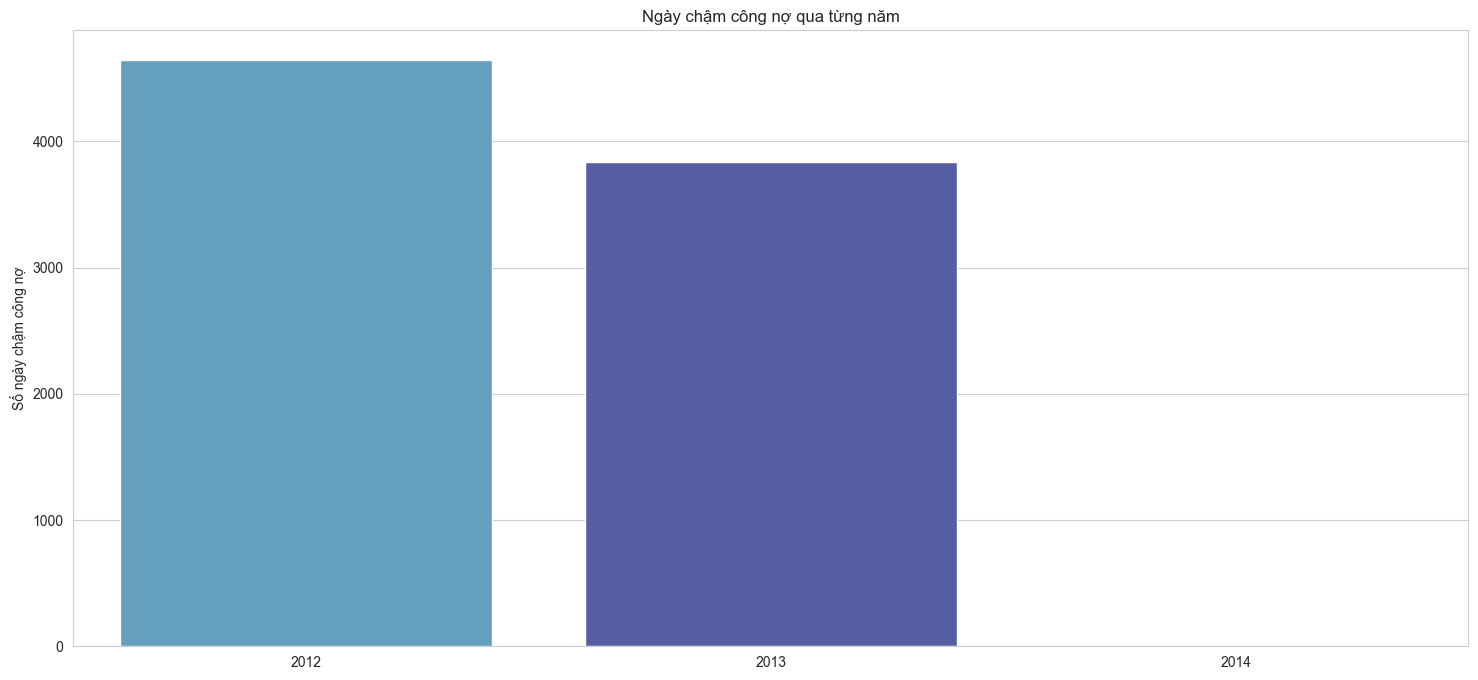

In [431]:
def year_2012(string):
    if '2012' in string:
        return True
    else:
        return False

year_2012 = df[df['DueDate'].apply(lambda x: year_2012(x))]

def year_2013(string):
    if '2013' in string:
        return True
    else:
        return False

year_2013 = df[df['DueDate'].apply(lambda x: year_2013(x))]


def year_2014(string):
    if '2014' in string:
        return True
    else:
        return False

year_2014 = df[df['DueDate'].apply(lambda x: year_2014(x))]

plt.figure()
sns.barplot(x=[2012,2013,2014], y=[year_2012['DaysLate'].sum(), year_2013['DaysLate'].sum(), year_2014['DaysLate'].sum()])
plt.title('Ngày chậm công nợ qua từng năm')
plt.ylabel('Số ngày chậm công nợ')
plt.show()

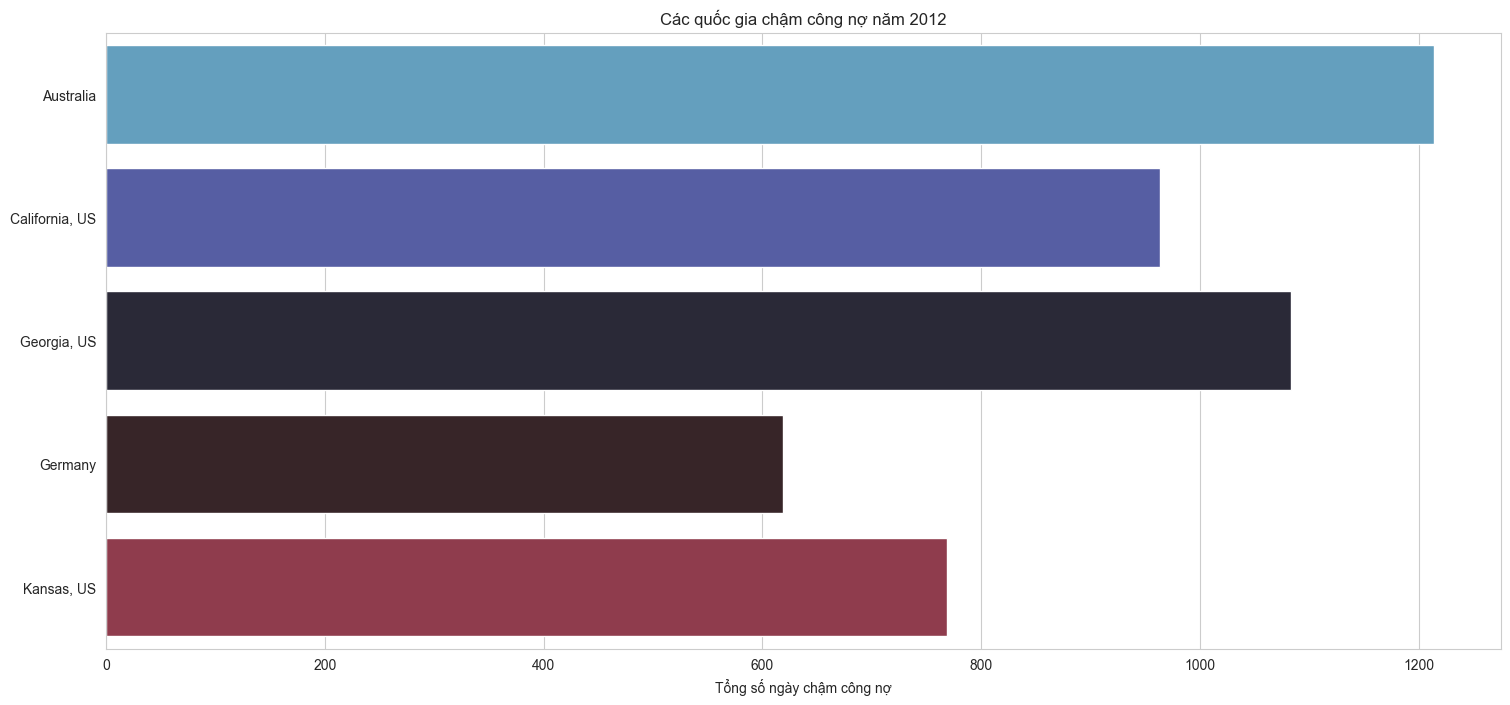

In [432]:
keys = list(dict(year_2012.groupby(['countryName']).sum()['DaysLate']).keys())
items = list(dict(year_2012.groupby(['countryName']).sum()['DaysLate']).values())


plt.figure()

sns.barplot(x=items, y=keys)
plt.title('Các quốc gia chậm công nợ năm 2012')
plt.xlabel('Tổng số ngày chậm công nợ')
plt.show()

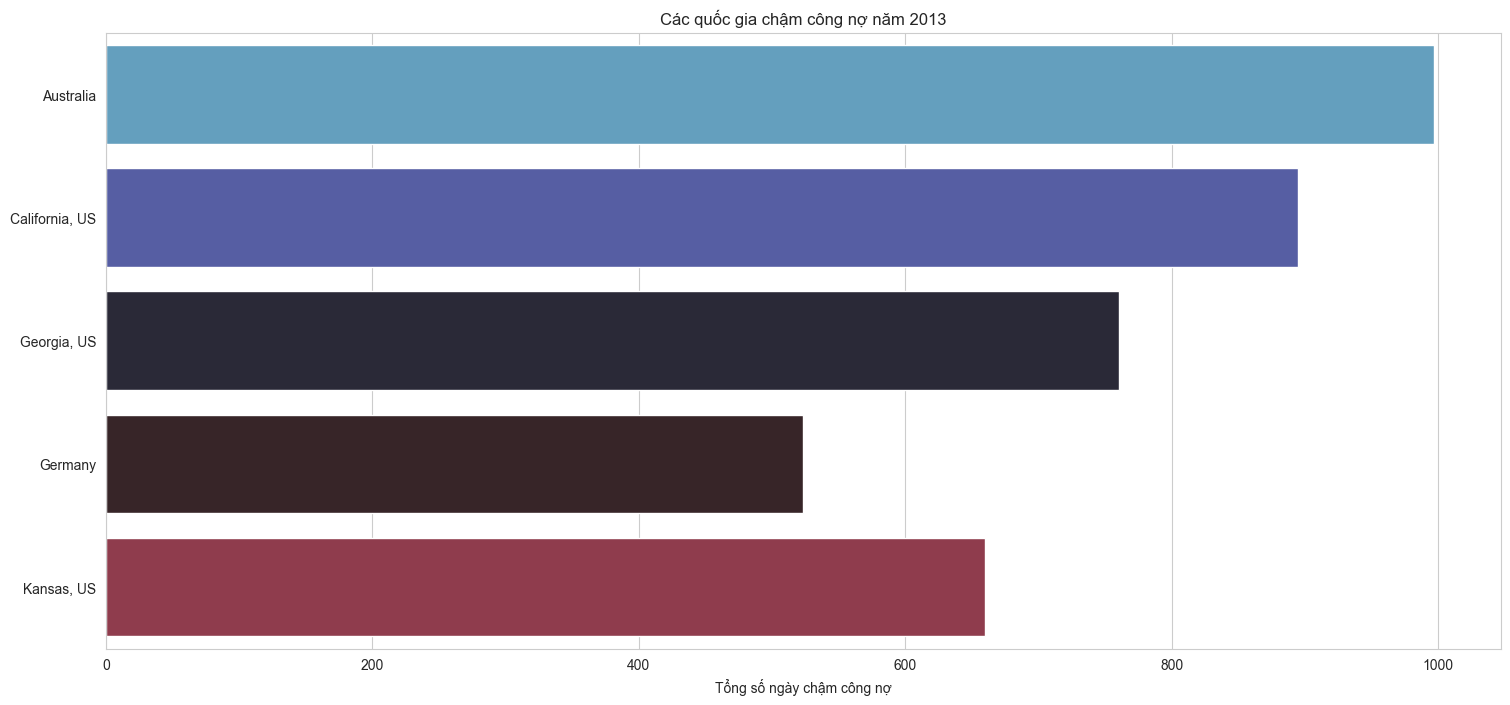

In [433]:
keys = list(dict(year_2013.groupby(['countryName']).sum()['DaysLate']).keys())
items = list(dict(year_2013.groupby(['countryName']).sum()['DaysLate']).values())

plt.figure()

sns.barplot(x=items, y=keys)
plt.title('Các quốc gia chậm công nợ năm 2013')
plt.xlabel('Tổng số ngày chậm công nợ')
plt.show()

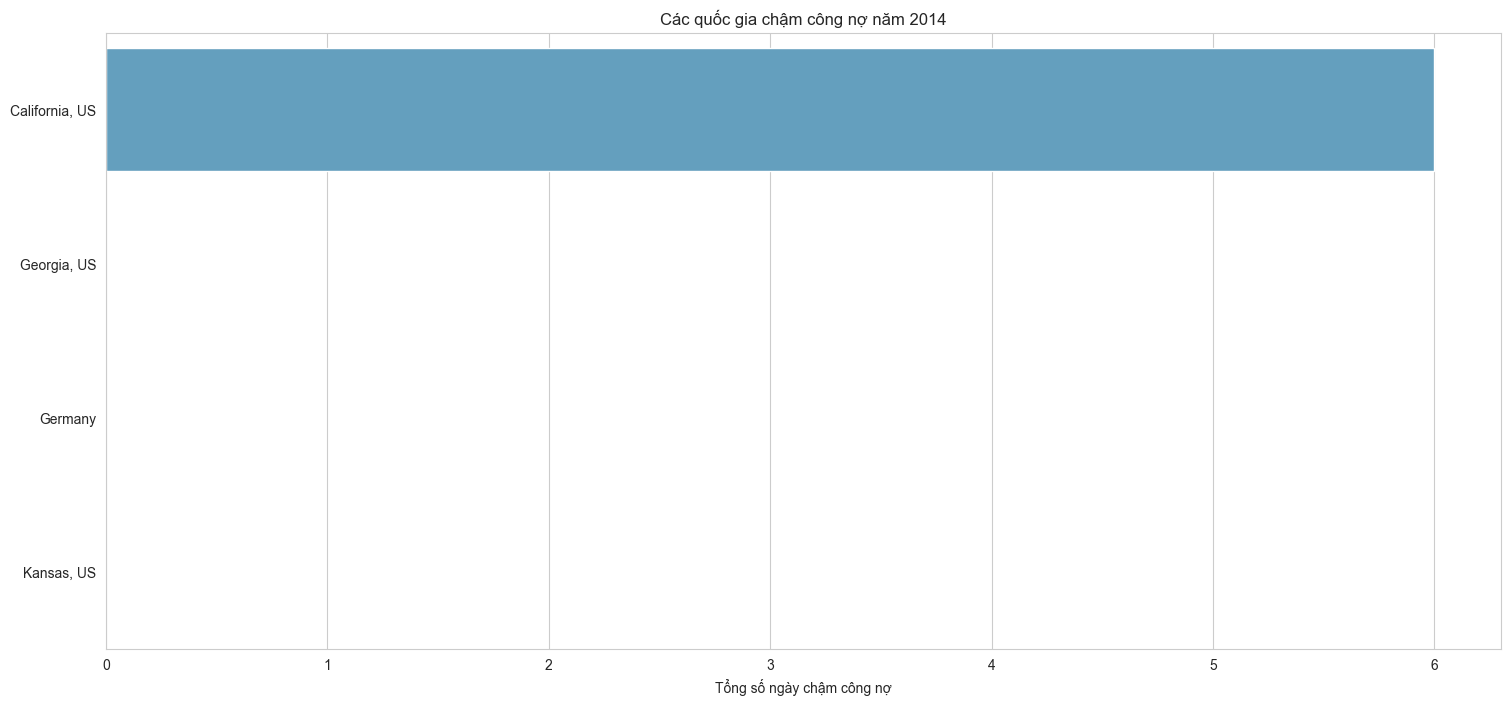

In [434]:
keys = list(dict(year_2014.groupby(['countryName']).sum()['DaysLate']).keys())
items = list(dict(year_2014.groupby(['countryName']).sum()['DaysLate']).values())

plt.figure()

sns.barplot(x=items, y=keys)
plt.title('Các quốc gia chậm công nợ năm 2014')
plt.xlabel('Tổng số ngày chậm công nợ')
plt.show()

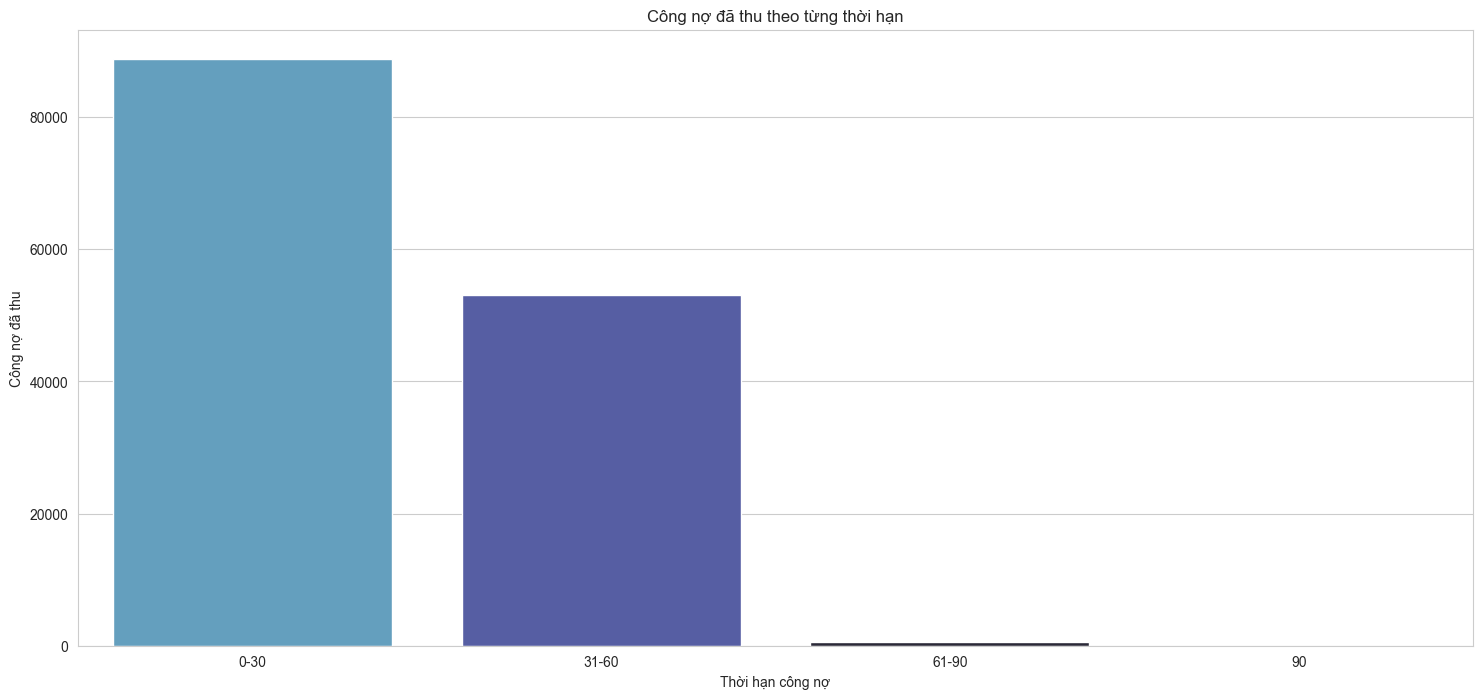

In [435]:
group_1 = df[df['DaysToSettle'] < 30]['InvoiceAmount'].sum()
group_2 = df[(df['DaysToSettle'] > 30) & (df['DaysToSettle'] < 60)]['InvoiceAmount'].sum()
group_3 = df[(df['DaysToSettle'] > 60) & (df['DaysToSettle'] < 90)]['InvoiceAmount'].sum()
group_4 = df[df['DaysToSettle'] == 90]['InvoiceAmount'].sum()


RecevTimeLimit = ['0-30','31-60','61-90','90']
plt.figure()

sns.barplot(y=[group_1, group_2, group_3, group_4], x= RecevTimeLimit)
plt.title('Công nợ đã thu theo từng thời hạn')
plt.xlabel('Thời hạn công nợ')
plt.ylabel('Công nợ đã thu')
plt.show()

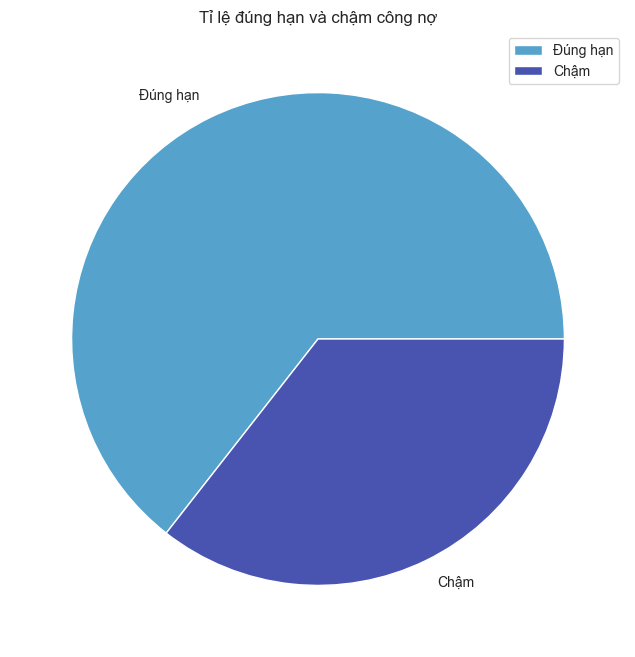

In [436]:
on_time = df[df['DaysLate'] == 0]['customerID'].count()
late = df[df['DaysLate'] != 0 ]['customerID'].count()
labels = ['Đúng hạn', 'Chậm']

plt.figure()

pie = plt.pie([on_time, late], labels = labels)
plt.title('Tỉ lệ đúng hạn và chậm công nợ')
plt.legend(['Đúng hạn', 'Chậm'])
plt.show()

In [437]:
df['PaperlessDate'] = pd.to_datetime(df['PaperlessDate'])
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['DueDate'] = pd.to_datetime(df['DueDate'])
df['SettledDate'] = pd.to_datetime(df['SettledDate'])

date_columns = ['PaperlessDate','InvoiceDate','DueDate','SettledDate']

df['PaperlessDate_year'] = df['PaperlessDate'].dt.year
df['PaperlessDate_day'] = df['PaperlessDate'].dt.day
df['PaperlessDate_month'] = df['PaperlessDate'].dt.month

df['InvoiceDate_year'] = df['InvoiceDate'].dt.year
df['InvoiceDate_month'] = df['InvoiceDate'].dt.month
df['InvoiceDate_day'] = df['InvoiceDate'].dt.day

df['DueDate_year'] = df['DueDate'].dt.year
df['DueDate_month'] = df['DueDate'].dt.month
df['DueDate_day'] = df['DueDate'].dt.day

df['SettledDate_year'] = df['SettledDate'].dt.year
df['SettledDate_month'] = df['SettledDate'].dt.month
df['SettledDate_day'] = df['SettledDate'].dt.day



df.head()

,customerID,PaperlessDate,invoiceNumber,InvoiceDate,DueDate,InvoiceAmount,Disputed,SettledDate,PaperlessBill,DaysToSettle,...,PaperlessDate_month,InvoiceDate_year,InvoiceDate_month,InvoiceDate_day,DueDate_year,DueDate_month,DueDate_day,SettledDate_year,SettledDate_month,SettledDate_day
0,0379-NEVHP,2013-04-06,611365,2013-01-02,2013-02-01,55.94,No,2013-01-15,Paper,13,...,4,2013,1,2,2013,2,1,2013,1,15
1,8976-AMJEO,2012-03-03,7900770,2013-01-26,2013-02-25,61.74,Yes,2013-03-03,Electronic,36,...,3,2013,1,26,2013,2,25,2013,3,3
2,2820-XGXSB,2012-01-26,9231909,2013-07-03,2013-08-02,65.88,No,2013-07-08,Electronic,5,...,1,2013,7,3,2013,8,2,2013,7,8
3,9322-YCTQO,2012-04-06,9888306,2013-02-10,2013-03-12,105.92,No,2013-03-17,Electronic,35,...,4,2013,2,10,2013,3,12,2013,3,17
4,6627-ELFBK,2012-11-26,15752855,2012-10-25,2012-11-24,72.27,Yes,2012-11-28,Paper,34,...,11,2012,10,25,2012,11,24,2012,11,28


In [438]:
df.drop(['customerID','invoiceNumber','SettledDate','InvoiceDate','PaperlessDate','DueDate'], axis = 1, inplace = True)

In [439]:
CountryN = ['countryName'] 
encoded_categ = pd.get_dummies(df[CountryN] ,drop_first=True)

df['Disputed'] = df['Disputed'].replace({'Yes':1, 'No':0})
df['PaperlessBill'] = df['PaperlessBill'].replace({'Electronic':1, 'Paper':0})

df = pd.concat([df, encoded_categ], axis = 1)

df = df.drop(columns = CountryN, axis = 1)

df.head()

,InvoiceAmount,Disputed,PaperlessBill,DaysToSettle,DaysLate,PaperlessDate_year,PaperlessDate_day,PaperlessDate_month,InvoiceDate_year,InvoiceDate_month,...,DueDate_year,DueDate_month,DueDate_day,SettledDate_year,SettledDate_month,SettledDate_day,"countryName_California, US","countryName_Georgia, US",countryName_Germany,"countryName_Kansas, US"
0,55.94,0,0,13,0,2013,6,4,2013,1,...,2013,2,1,2013,1,15,False,False,True,False
1,61.74,1,1,36,6,2012,3,3,2013,1,...,2013,2,25,2013,3,3,False,False,False,False
2,65.88,0,1,5,0,2012,26,1,2013,7,...,2013,8,2,2013,7,8,False,False,True,False
3,105.92,0,1,35,5,2012,6,4,2013,2,...,2013,3,12,2013,3,17,False,False,False,False
4,72.27,1,0,34,4,2012,26,11,2012,10,...,2012,11,24,2012,11,28,True,False,False,False


In [440]:
columns = list(df.select_dtypes(['object','uint8']).columns)

for i in columns:
    df[i] = df[i].astype('int64')
df.dtypes.to_frame(name='Type')

,Type
InvoiceAmount,float64
Disputed,int64
PaperlessBill,int64
DaysToSettle,int64
DaysLate,int64
PaperlessDate_year,int32
PaperlessDate_day,int32
PaperlessDate_month,int32
InvoiceDate_year,int32
InvoiceDate_month,int32


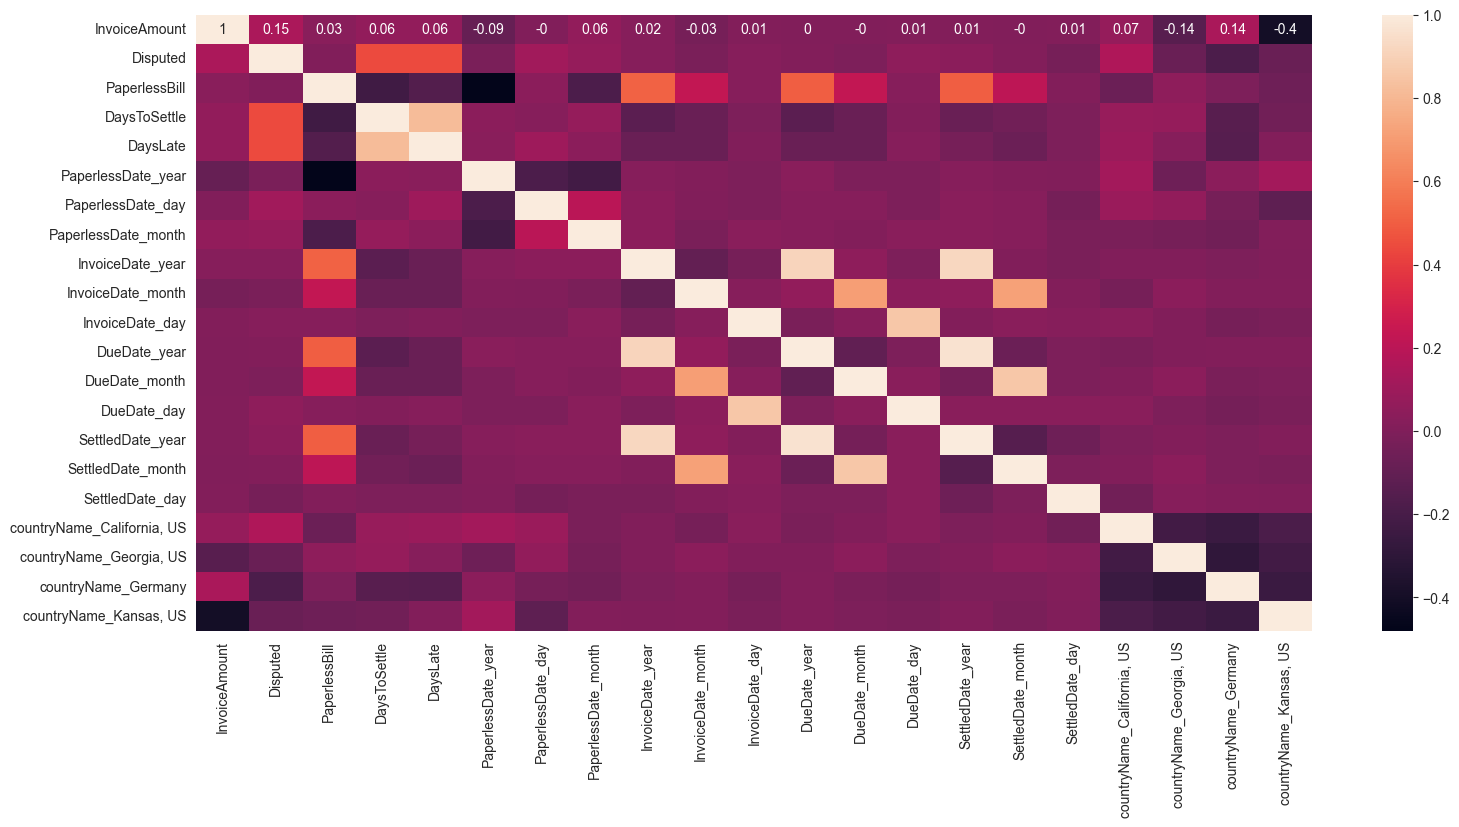

In [441]:
correlation = df.corr().round(2)
plt.figure()
sns.heatmap(correlation, annot = True)
plt.show()

In [442]:
df.drop('InvoiceDate_day', axis =1, inplace = True)

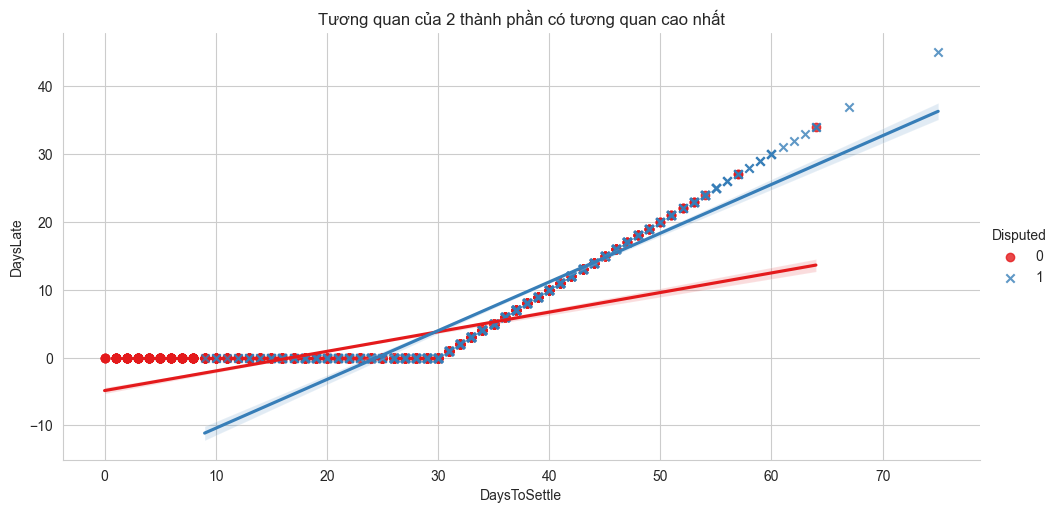

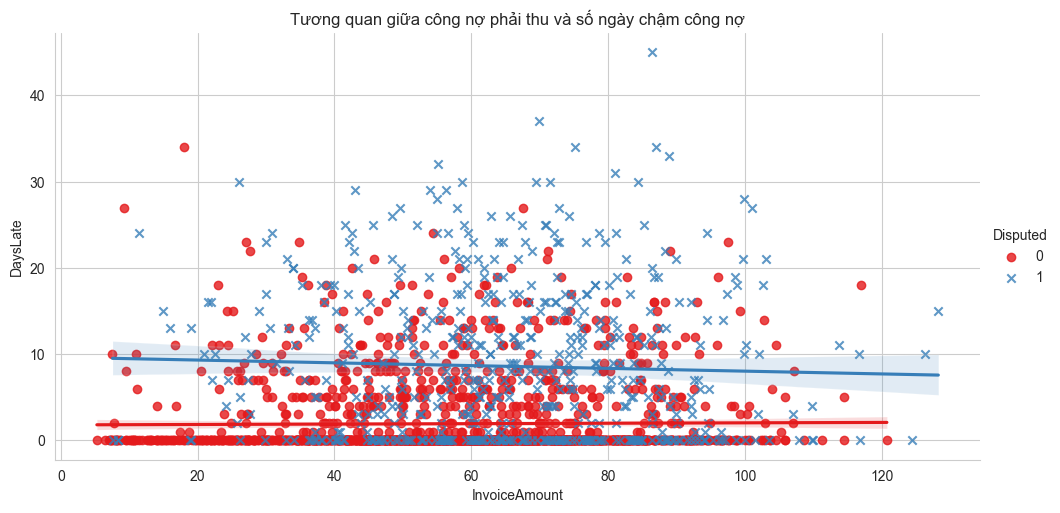

In [443]:
sns.lmplot(x="DaysToSettle", y="DaysLate", hue="Disputed", data=df ,markers=["o", "x"], palette="Set1", aspect = 2);
plt.title('Tương quan của 2 thành phần có tương quan cao nhất')

sns.lmplot(x="InvoiceAmount", y="DaysLate", hue="Disputed", data=df,markers=["o", "x"], palette="Set1", aspect = 2);

plt.title('Tương quan giữa công nợ phải thu và số ngày chậm công nợ')
plt.show()

In [444]:
features = df.drop(columns =['DaysLate'], axis = 1)

target = df['DaysLate']

X_train, X_test, y_train, y_test = train_test_split(features, target, shuffle = True, test_size = .2, random_state = 44)

In [445]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.fit_transform(X_test)

In [446]:
regressors = [
    GradientBoostingRegressor(),
    RandomForestRegressor(),
]

head = 2
for model in regressors[:head]:
    start = time()
    model.fit(X_train, y_train)
    train_time = time() - start
    start = time()
    y_pred = model.predict(X_test)
    predict_time = time()-start    
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print("\tExplained variance:", explained_variance_score(y_test, y_pred))
    print("\tMean absolute error:", mean_absolute_error(y_test, y_pred))
    print("\tMean squared error:", mean_squared_error(y_test, y_pred))
    print("\tR2 score:", r2_score(y_test, y_pred))
    print()

GradientBoostingRegressor()
	Training time: 0.427s
	Prediction time: 0.001s
	Explained variance: 0.9979647743796269
	Mean absolute error: 0.09165991875519522
	Mean squared error: 0.09176483166924568
	R2 score: 0.9977796054496492

RandomForestRegressor()
	Training time: 0.466s
	Prediction time: 0.009s
	Explained variance: 0.9980158400227652
	Mean absolute error: 0.09204453441295547
	Mean squared error: 0.08964554655870444
	R2 score: 0.9978308848888906



In [447]:
cert_model = GradientBoostingRegressor()
cert_model.fit(X_train, y_train)
cert_y_pred = list(model.predict(X_test))

y_test = list(y_test)
print('Kiểm tra model \n')

for i in range(1,20):
    print(i,') ', 'Test:',y_test[i], ' Dự đoán:', round(cert_y_pred[i]))

Kiểm tra model 

1 )  Test: 0  Dự đoán: 0
2 )  Test: 0  Dự đoán: 0
3 )  Test: 0  Dự đoán: 0
4 )  Test: 10  Dự đoán: 10
5 )  Test: 15  Dự đoán: 15
6 )  Test: 0  Dự đoán: 0
7 )  Test: 0  Dự đoán: 0
8 )  Test: 0  Dự đoán: 0
9 )  Test: 0  Dự đoán: 0
10 )  Test: 0  Dự đoán: 0
11 )  Test: 8  Dự đoán: 8
12 )  Test: 8  Dự đoán: 8
13 )  Test: 3  Dự đoán: 4
14 )  Test: 0  Dự đoán: 0
15 )  Test: 12  Dự đoán: 12
16 )  Test: 0  Dự đoán: 0
17 )  Test: 34  Dự đoán: 34
18 )  Test: 1  Dự đoán: 2
19 )  Test: 20  Dự đoán: 20


In [448]:
cert_model = RandomForestRegressor()
cert_model.fit(X_train, y_train)
cert_y_pred = list(model.predict(X_test))

y_test = list(y_test)
print('Kiểm tra model \n')

for i in range(1,20):
    print(i,') ', 'Test:',y_test[i], ' Dự đoán:', round(cert_y_pred[i]))

Kiểm tra model 

1 )  Test: 0  Dự đoán: 0
2 )  Test: 0  Dự đoán: 0
3 )  Test: 0  Dự đoán: 0
4 )  Test: 10  Dự đoán: 10
5 )  Test: 15  Dự đoán: 15
6 )  Test: 0  Dự đoán: 0
7 )  Test: 0  Dự đoán: 0
8 )  Test: 0  Dự đoán: 0
9 )  Test: 0  Dự đoán: 0
10 )  Test: 0  Dự đoán: 0
11 )  Test: 8  Dự đoán: 8
12 )  Test: 8  Dự đoán: 8
13 )  Test: 3  Dự đoán: 4
14 )  Test: 0  Dự đoán: 0
15 )  Test: 12  Dự đoán: 12
16 )  Test: 0  Dự đoán: 0
17 )  Test: 34  Dự đoán: 34
18 )  Test: 1  Dự đoán: 2
19 )  Test: 20  Dự đoán: 20
